In [1]:
import yfinance as yf

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
stocks = ['JPM', 'AAPL', 'FB']
yahoo_df = yf.download(stocks, start="2020-01-01", end="2021-01-01")
returns_df = pd.DataFrame(columns=stocks)
log_returns_df = pd.DataFrame(columns=stocks)
gross_returns_df = pd.DataFrame(columns=stocks)

[*********************100%***********************]  3 of 3 completed


In [3]:
plt.style.use(['science', 'retro', 'grid'])

## Simple Return

In [4]:
for stock in stocks:
    returns_df[stock] = yahoo_df['Close'][stock].pct_change()[1:]

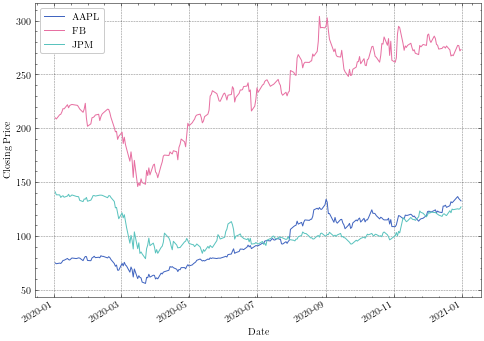

In [5]:
yahoo_df['Close'].plot(figsize=(8, 6))
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.savefig('./closing_price')

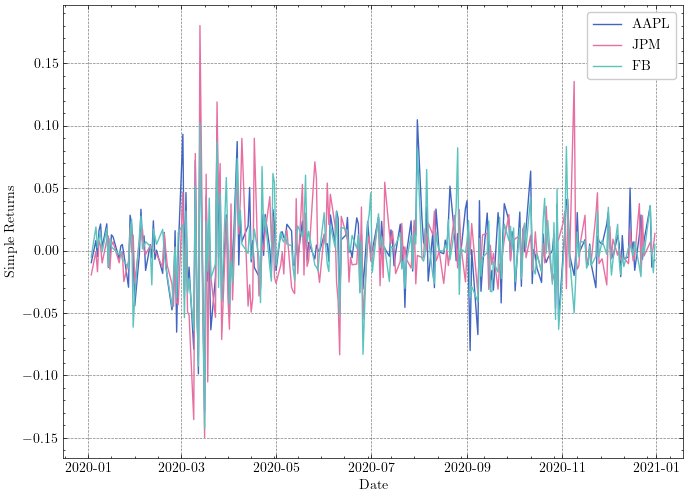

In [9]:
plt.figure(figsize=(8, 6), dpi=100)
plt.plot(returns_df['AAPL'], label='AAPL')
plt.plot(returns_df['JPM'], label='JPM')
plt.plot(returns_df['FB'], label='FB')
plt.xlabel('Date')
plt.ylabel('Simple Returns')
plt.legend()
plt.savefig('daily_returns_line')

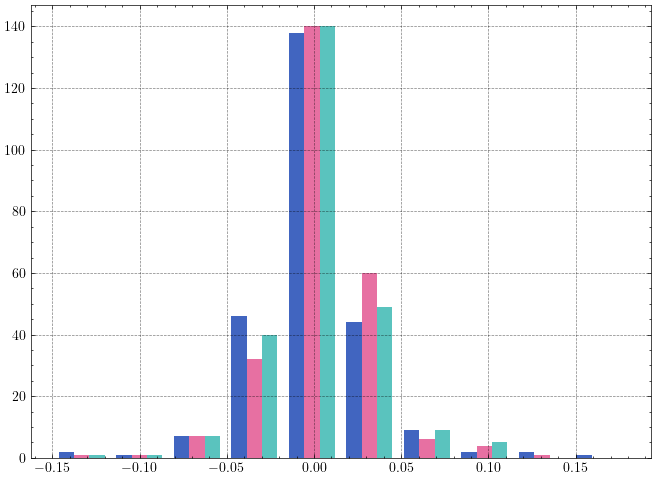

In [29]:
plt.figure(figsize=(8, 6), dpi=100)
plt.hist(returns_df);

<AxesSubplot:ylabel='Frequency'>

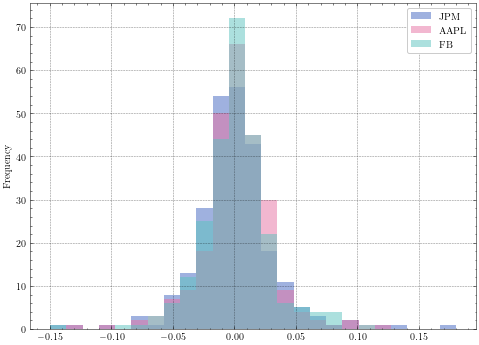

In [37]:
returns_df.plot.hist(bins=25, alpha=0.5, figsize=(8, 6))

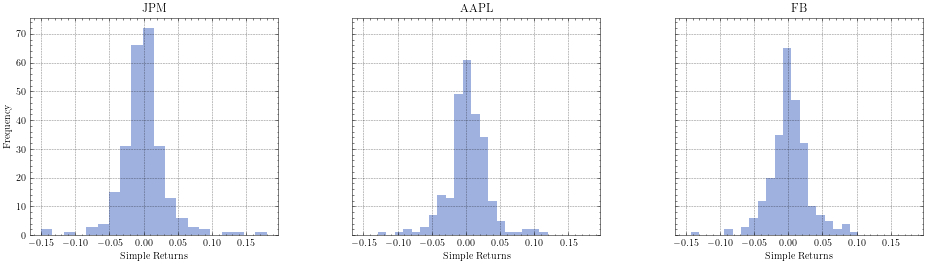

In [58]:
axarr = returns_df.hist(bins=20, alpha=0.5, figsize=(16, 4), sharex=True, sharey=True, layout=(1,3))

for ax in axarr.flatten():
    ax.set_xlabel("Simple Returns")
    ax.set_ylabel("Frequency")

plt.savefig('daily_returns_hist')

## Log return

In [71]:
for stock in stocks:
    log_returns_df[stock] = np.log(yahoo_df['Close'][stock]) - np.log(yahoo_df['Close'][stock].shift(1))

In [75]:
log_returns_df = log_returns_df[1:]

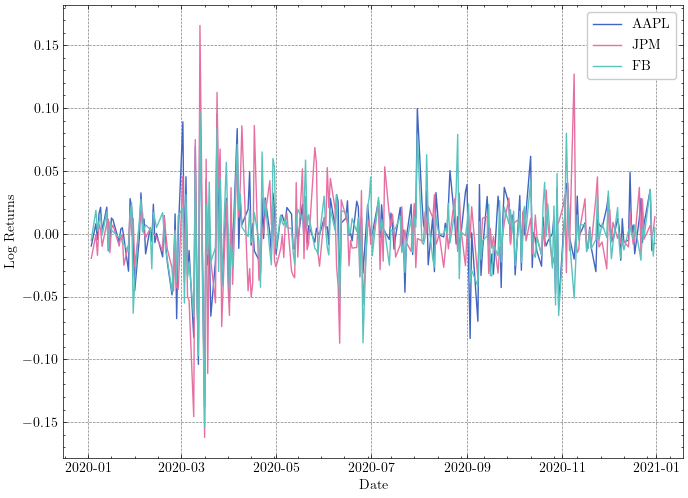

In [81]:
plt.figure(figsize=(8, 6), dpi=100)
plt.plot(log_returns_df['AAPL'], label='AAPL')
plt.plot(log_returns_df['JPM'], label='JPM')
plt.plot(log_returns_df['FB'], label='FB')
plt.xlabel('Date')
plt.ylabel('Log Returns')
plt.legend()
plt.savefig('daily_log_returns_line')

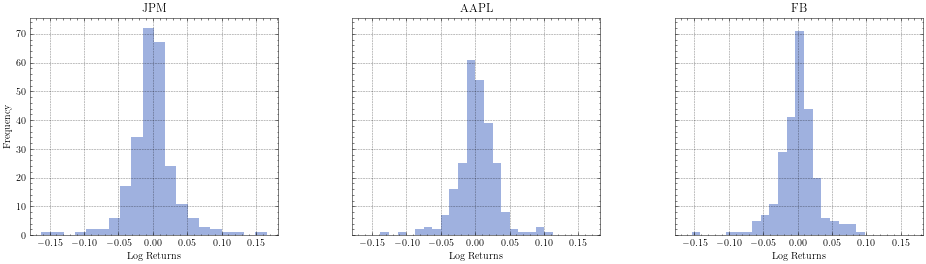

In [80]:
axarr = log_returns_df.hist(bins=20, alpha=0.5, figsize=(16, 4), sharex=True, sharey=True, layout=(1,3))

for ax in axarr.flatten():
    ax.set_xlabel("Log Returns")
    ax.set_ylabel("Frequency")

plt.savefig('daily_log_returns_hist')

## Gross return

In [83]:
for stock in stocks:
    gross_returns_df[stock] = yahoo_df['Close'][stock] / yahoo_df['Close'][stock].shift(1)

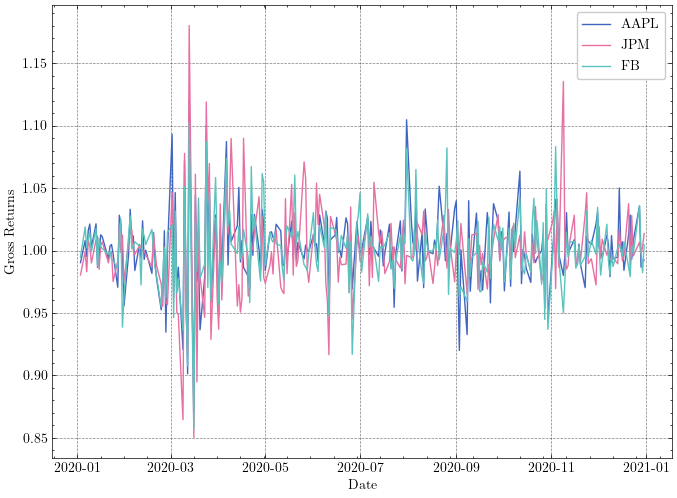

In [86]:
plt.figure(figsize=(8, 6), dpi=100)
plt.plot(gross_returns_df['AAPL'], label='AAPL')
plt.plot(gross_returns_df['JPM'], label='JPM')
plt.plot(gross_returns_df['FB'], label='FB')
plt.xlabel('Date')
plt.ylabel('Gross Returns')
plt.legend()
plt.savefig('daily_gross_returns_line')

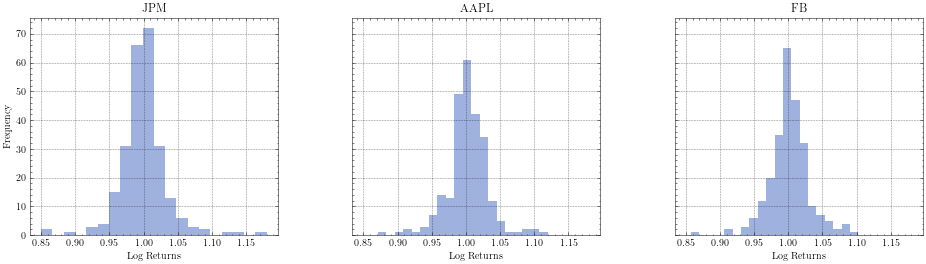

In [88]:
axarr = gross_returns_df.hist(bins=20, alpha=0.5, figsize=(16, 4), sharex=True, sharey=True, layout=(1,3))

for ax in axarr.flatten():
    ax.set_xlabel("Log Returns")
    ax.set_ylabel("Frequency")

plt.savefig('daily_gross_returns_hist')